In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
months = [f"{x:02d}" for x in range(9,10)]
years = [f"{x:04d}" for x in range(21,321)]
i =0
result = np.zeros((300,62,601))

In [3]:
for yy in years:
    for mm in months:
        data=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn300/B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.'+yy+'-'+mm +'.UVEL.nc')
        plotvar = data.variables['UVEL'][0,:,:,1130]
        lont = data.variables['ULONG'][:,1130]
        latt = data.variables['ULAT'][:,1130]
        plotvar = plotvar[:,:]
        aveplot = plotvar
        result[i] = aveplot
        
        i = i + 1

In [4]:
result.shape

(300, 62, 601)

In [5]:
result[result > 50] = np.nan

In [6]:
data1=nc.Dataset('/ihesp/user/xiliangdiao/ihespdata/ocn1/z_t.nc')
A = data1.variables['z_t'][:]/100

In [7]:
B= latt
xx, yy = np.meshgrid(B, A)
###############################################################
my_font = {'fontname':'Cambria', 'size':'45'}
nice_cmap=sns.diverging_palette(245, 15, n=11,as_cmap=True)
#nice_cmap=sns.diverging_palette(245, 10, n=10,as_cmap=True)
lev_cmap = nice_cmap([1,30,50,60,70,90,150,190,210,220,230,240]) 
new_cmap = cols.ListedColormap(lev_cmap,"praj_cmap")
nice_levels = [-5,-4,-3,-2,-1,0,1,2,3,4,5]
norm = mpl.colors.BoundaryNorm(nice_levels, new_cmap.N)
#********************************************************************

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:4: UserWarning: The following kwargs were not used by contour: 'spacing'
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Zonal Velocity(year 290-300) JASO average,  3$^\\circ$E')

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


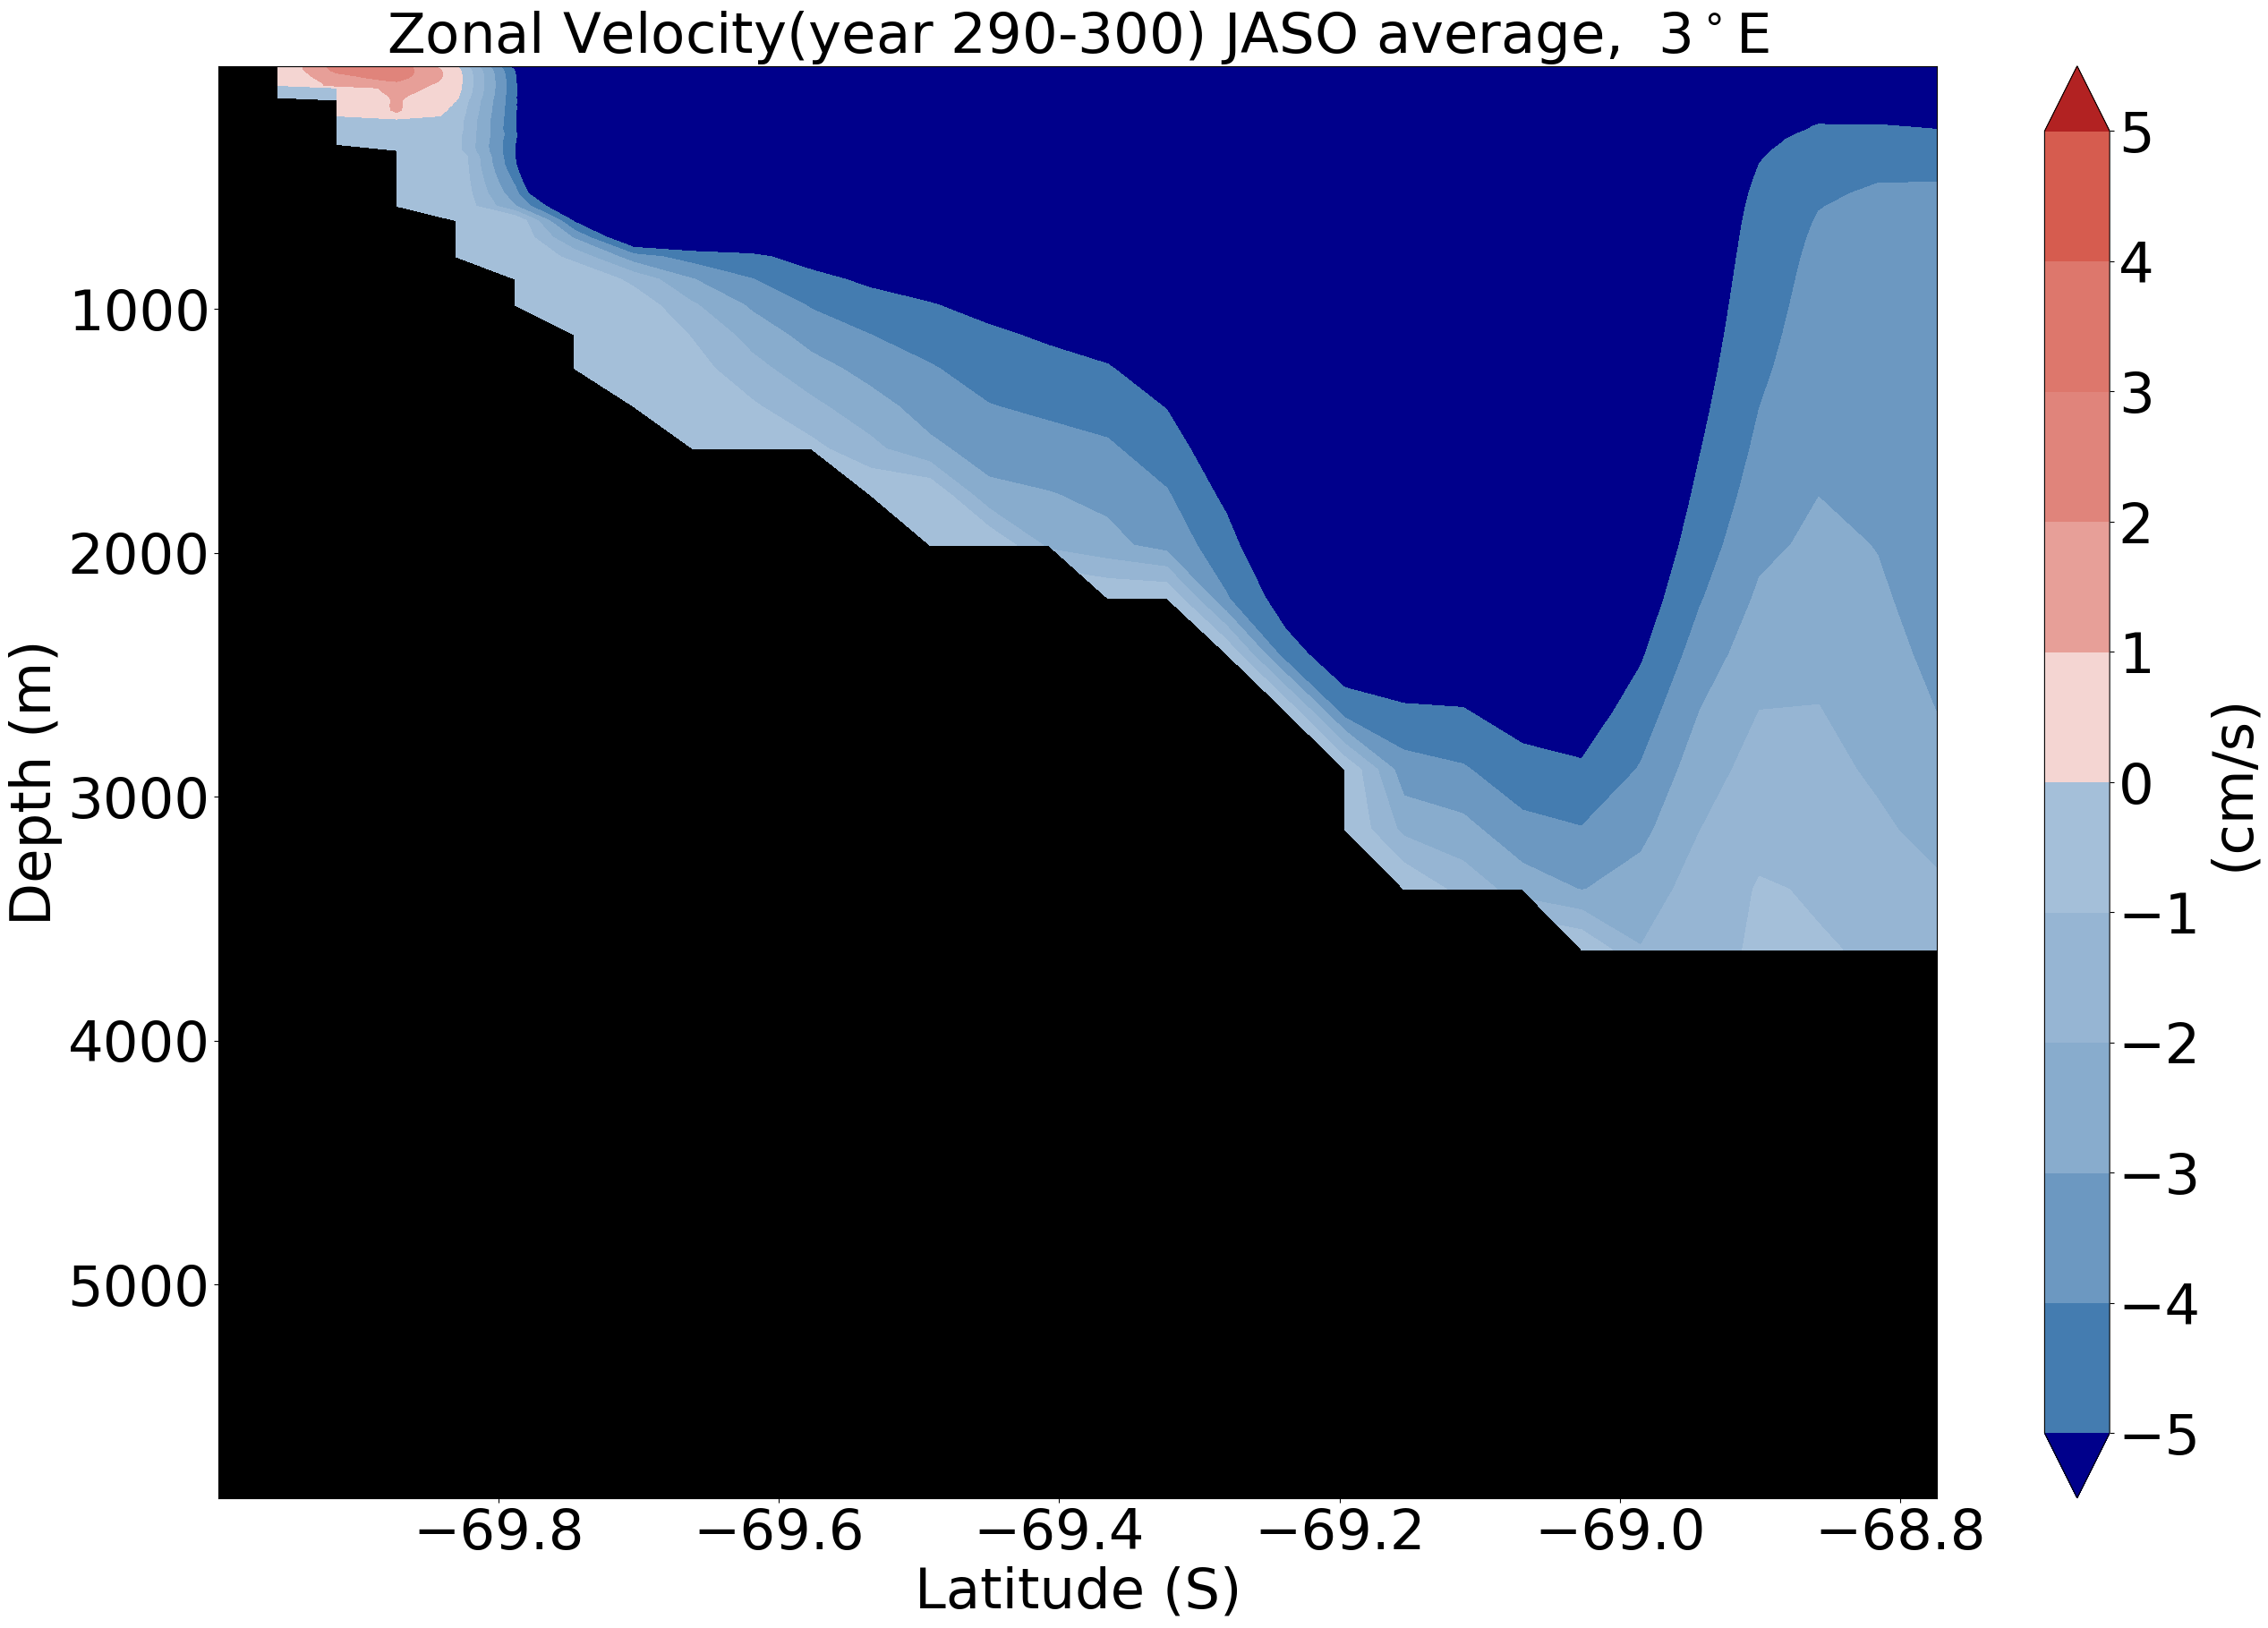

In [8]:
# plot the result
fig = plt.figure(figsize=(30,20), dpi=100)
ax0 = fig.add_axes([0.2, 0.1, 0.8, 0.8])
im = ax0.contourf(xx[:,200:230], yy[:,200:230], result[1,:,200:230],cmap=new_cmap,norm =norm,spacing = 'uniform',levels = nice_levels,extend='both')
im.cmap.set_over('firebrick')
im.cmap.set_under('darkblue')
ax0.set_facecolor("black")
#ax0.imshow(np.where(plotvar.mask)[0],np.where(plotvar.mask)[1])
#CS = ax0.contour(xx[:45,:], yy[:45,:], PD[:45,:],colors = 'black', linestyles = 'solid',linewidths=3)
#plt.clabel(CS,fontsize=20)
cbar = fig.colorbar(im, ax=ax0,ticks=nice_levels,spacing='uniform')
cbar.ax.tick_params(labelsize=45)
cbar.set_label('(cm/s)', **my_font)
ax0.set_title('Mixed Layer Depth')
#############################################################################
plt.xticks(**my_font)
plt.yticks(**my_font)
plt.xlabel('Latitude (S)',**my_font)
plt.ylabel('Depth (m)',**my_font)
plt.gca().invert_yaxis()
ax0.set_title('Zonal Velocity(year 290-300) JASO average,  3$^\circ$E',**my_font)

In [9]:
re = np.nanmean(result,axis=1)

/scratch/user/xiliangdiao/.conda/envs/python3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: Mean of empty slice
  """Entry point for launching an IPython kernel.


In [10]:
re.shape

(300, 601)

In [11]:
cut = re[:,200:230]

In [12]:
cut.shape

(300, 30)

In [13]:
final = np.nanmean(cut,axis=1)

In [44]:
wwg = np.convolve(final, np.ones((5,))/5, mode='valid')

In [46]:
wwg.shape

(296,)

Text(0.5, 1.0, 'ASC Zonal Speed averaged over (70$^\\circ$S - 68.8$^\\circ$S, 3$^\\circ$E)')

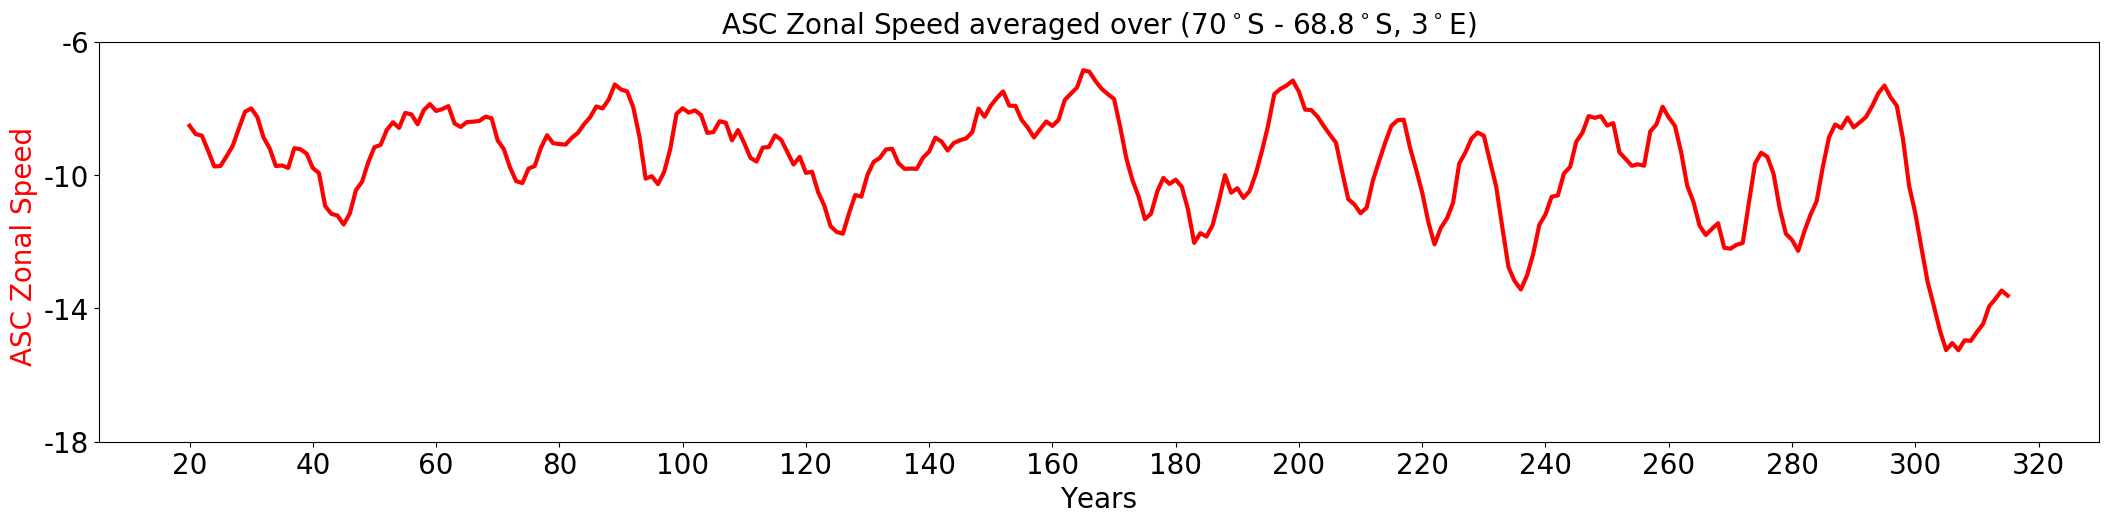

In [45]:
fig = plt.figure(figsize=(25,5), dpi=100)
ax0 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
my_font = {'fontname':'Cambria', 'size':'20'}
im = ax0.plot(wwg,'r',linewidth=3)
#im = ax0.plot(weddle,'r*')
#plt.xticks(range(0,310,10), ['20','70','120', '170', '220', '270','320'],**my_font)
plt.xticks(range(0,320,20), ['20', '40', '60', '80','100','120','140','160',\
                             '180','200','220', '240', '260','280','300','320','340','360','380','400','420','440',\
                            '460','480','500'],**my_font)
plt.yticks(range(-18,-4,4), ['-18', '-14','-10','-6', '-2'],**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('ASC Zonal Speed ',color= 'red',**my_font)
plt.title('ASC Zonal Speed averaged over (70$^\circ$S - 68.8$^\circ$S, 3$^\circ$E)',**my_font)

In [24]:
data1 = np.loadtxt("21-61new.out")
data2 = np.loadtxt("61-101new.out")
data3 = np.loadtxt("101-141new.out")
data4 = np.loadtxt("141-181new.out")
data5 = np.loadtxt("181-221new.out")
data6 = np.loadtxt("221-261new.out")
data7 = np.loadtxt("261-291new.out")
data8 = np.loadtxt("291-321new.out")
data9 = np.loadtxt("321-331new.out")
result = np.zeros(3720)
result[0:480] =data1
result[480:960] =data2
result[960:1440] =data3
result[1440:1920] =data4
result[1920:2400] =data5
result[2400:2880] =data6
result[2880:3240] =data7
result[3240:3600] =data8
result[3600:3720] =data9

In [25]:
result[1254] = (result[1253] + result[1256])/2
result[1255] = (result[1253] + result[1256])/2
ww2 = np.convolve(result, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww2)
fin = ww2 -mean

In [38]:
fin.shape

(3661,)

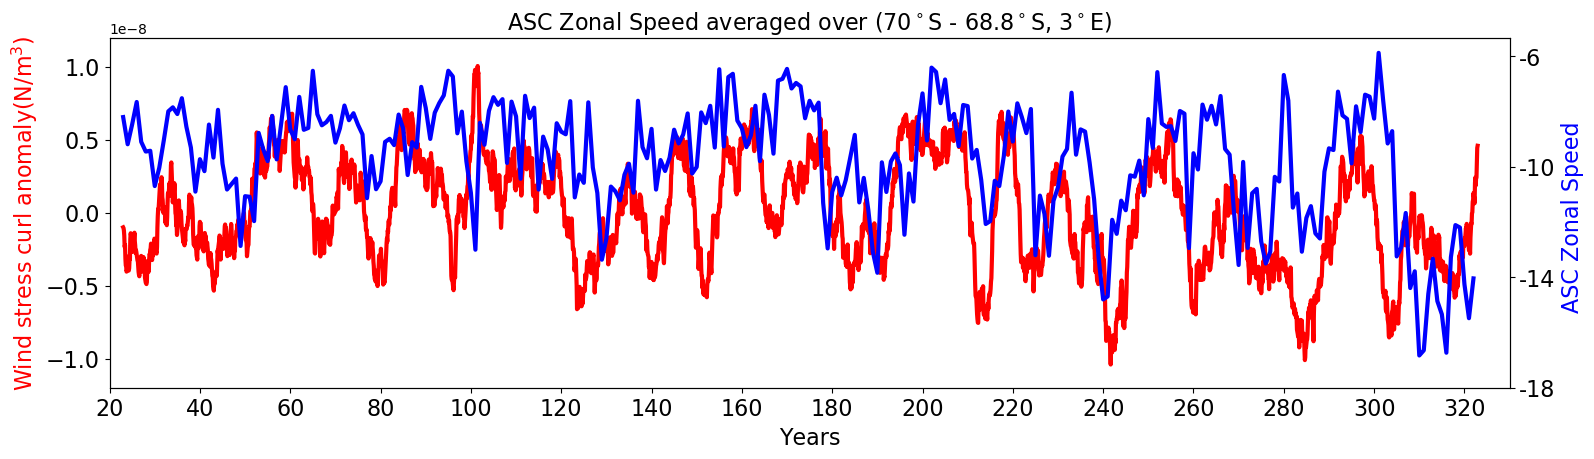

In [54]:
t = np.arange(36,3636,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
ax0.plot(t,0.0001*fin[:3600],'red',linewidth=3)
plt.xticks(range(0,3720,240), ['20', '40', '60', '80','100','120','140','160','180','200','220', '240', '260','280','300','320'],**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Wind stress curl anomaly(N/m$^3$)',color= 'red',**my_font)
plt.axis("tight")
ax0.set(ylim=(-0.000000012, 0.000000012),xlim=(0, 3720))
#*****************************************************************
tt = np.arange(36,3636,12)
ax2 = ax0.twinx() 
ax2.plot(tt,final,'b',linewidth=3)
plt.yticks(range(-18,-4,4), ['-18', '-14','-10','-6', '-2'],**my_font)
plt.ylabel('ASC Zonal Speed ',color= 'blue',**my_font)
plt.title('ASC Zonal Speed averaged over (70$^\circ$S - 68.8$^\circ$S, 3$^\circ$E)',**my_font)
plt.savefig("new.png",bbox_inches='tight',dpi=fig.dpi)